In [2]:
%%bash -x
pip install --user currencyconverter

  Running setup.py bdist_wheel for currencyconverter: started
  Running setup.py bdist_wheel for currencyconverter: finished with status 'done'
  Stored in directory: C:\Users\bijno\AppData\Local\pip\Cache\wheels\a8\29\14\6d7afe90527c286fdb018512a313a6b731fcd3d532ba1cefc2
Successfully built currencyconverter


+ pip install --user currencyconverter
thinc 6.10.3 has requirement cymem<1.32.0,>=1.30.0, but you'll have cymem 2.0.2 which is incompatible.
thinc 6.10.3 has requirement preshed<2.0.0,>=1.0.0, but you'll have preshed 3.0.2 which is incompatible.
  The script currency_converter.exe is installed in 'C:\Users\bijno\AppData\Roaming\Python\Python36\Scripts' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [188]:
%%bash -x
pip install hdbscan

  Using cached https://files.pythonhosted.org/packages/9f/db/c3e6b58518d0a19861eb0309670b8432a2237acae253db92ba9b523f9082/hdbscan-0.8.24.tar.gz
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Running setup.py bdist_wheel for hdbscan: started
  Running setup.py bdist_wheel for hdbscan: still running...
  Running setup.py bdist_wheel for hdbscan: still running...
  Running setup.py bdist_wheel for hdbscan: finished with status 'done'
  Stored in directory: C:\Users\bijno\AppData\Local\pip\Cache\wheels\6a\5a\ab\a3247c72fa70b67699d5f8be94bd0c2d3d38864825d773b9f1
Successfully built hdbscan


+ pip install hdbscan
thinc 6.10.3 has requirement cymem<1.32.0,>=1.30.0, but you'll have cymem 2.0.2 which is incompatible.
thinc 6.10.3 has requirement preshed<2.0.0,>=1.0.0, but you'll have preshed 3.0.2 which is incompatible.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
import currency_converter
from currency_converter import CurrencyConverter
c = CurrencyConverter()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import hdbscan
from pandas.plotting import parallel_coordinates

In [3]:
devices = pd.read_csv('F:\\rev\\rev-devices.csv')
notifications = pd.read_csv('F:\\rev\\rev-notifications.csv')
transactions = pd.read_csv('F:\\rev\\rev-transactions.csv')
users = pd.read_csv('F:\\rev\\rev-users.csv')

In [4]:
users.head(5)

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals
0,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.0,1.0,3,0,0
1,user_1,1975,GB,London,2018-01-29 03:38:46.676876,0,STANDARD,NaN,NaN,21,0,0
2,user_2,1987,PL,Poznań,2018-01-18 19:17:31.229096,0,STANDARD,0.0,0.0,21,0,0
3,user_3,1994,FR,Paris,2018-01-15 18:47:56.723104,0,STANDARD,1.0,0.0,0,0,0
4,user_4,1985,GB,Beckenham,2018-01-11 00:36:46.673673,0,STANDARD,NaN,NaN,2,0,0


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19430 entries, 0 to 19429
Data columns (total 12 columns):
user_id                                     19430 non-null object
birth_year                                  19430 non-null int64
country                                     19430 non-null object
city                                        19430 non-null object
created_date                                19430 non-null object
user_settings_crypto_unlocked               19430 non-null int64
plan                                        19430 non-null object
attributes_notifications_marketing_push     12820 non-null float64
attributes_notifications_marketing_email    12820 non-null float64
num_contacts                                19430 non-null int64
num_referrals                               19430 non-null int64
num_successful_referrals                    19430 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 1.8+ MB


In [6]:
transactions.head(1)

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_898,2018-04-03 03:34:21.784487


just trying to understand what's happening

In [7]:
users['users_created_year'] = pd.DatetimeIndex(users['created_date']).year
users['users_created_month'] = pd.DatetimeIndex(users['created_date']).month

transactions['transactions_created_year'] = pd.DatetimeIndex(transactions['created_date']).year
transactions['transactions_created_month'] = pd.DatetimeIndex(transactions['created_date']).month

In [8]:
ut = pd.merge(users, transactions, on='user_id')
ut['transaction_created']= pd.to_datetime(ut['created_date_y']).dt.date
ut['user_created']= pd.to_datetime(ut['created_date_x']).dt.date
ut.drop(columns=['created_date_x','created_date_y'])
ut.head(2)


,user_id,birth_year,country,city,created_date_x,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,...,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,created_date_y,transactions_created_year,transactions_created_month,transaction_created,user_created
0,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.0,1.0,3,...,NaN,NaN,NaN,NaN,OUTBOUND,2018-06-19 01:36:43.065466,2018,6,2018-06-19,2018-01-13
1,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.0,1.0,3,...,NaN,NaN,NaN,NaN,OUTBOUND,2018-06-25 03:51:25.977466,2018,6,2018-06-25,2018-01-13


Quality check the merged data

In [10]:
print(len(users), len(transactions), len(ut))
print(sum(transactions.amount_usd)-sum(ut.amount_usd))

19430 2740075 2740075
-0.4666748046875


In [9]:
'''
print((pd.Timestamp(max(ut.created_date_y)), pd.Timestamp(max(ut.created_date_x))))
print((pd.Timestamp(max(ut.created_date_y)) - pd.Timestamp(max(ut.created_date_x))).days)
print((pd.Timestamp(max(ut.created_date_y)) - pd.Timestamp(max(ut.created_date_x))).days/30)
print(type(min(ut.created_date_y)), min(ut.created_date_x))
'''
max_date = pd.Timestamp(max(ut.transaction_created)).date()
min_date = pd.Timestamp(min(ut.user_created)).date()

print('we have', (max_date - min_date).days, 'days of transaction data from', min_date, 'to', max_date)



we have 500 days of transaction data from 2018-01-01 to 2019-05-16


# run till here

# LTV - cohort analysis

heatmat of transacted amount (in hundreds of thousands)


[]

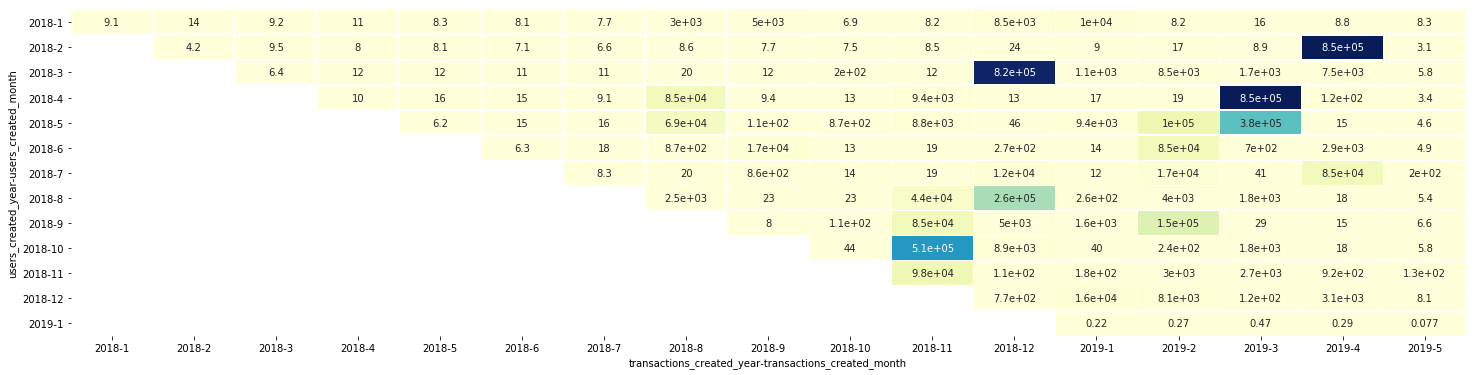

In [34]:
amount_transactions = pd.DataFrame(pd.crosstab([ut.users_created_year, ut.users_created_month], [ut.transactions_created_year, ut.transactions_created_month], values=ut['amount_usd'], aggfunc='sum'))

print('heatmat of transacted amount (in hundreds of thousands)')

f, ax = plt.subplots(figsize=(25, 6))
sns.heatmap(amount_transactions/100000, cmap="YlGnBu", annot=True, cbar=False, linewidths=.5, ax=ax).plot()

question from the cohort: why some specific months showed high transaction?

heatmat of unique users who transacted (in hundreds)


[]

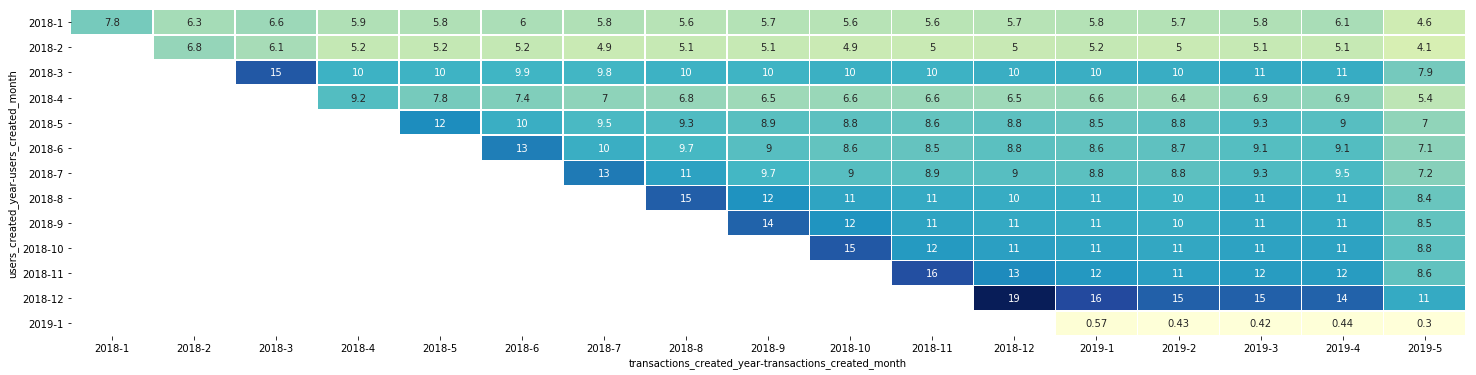

In [38]:
num_users_total = pd.DataFrame(pd.crosstab([ut.users_created_year, ut.users_created_month], [ut.transactions_created_year, ut.transactions_created_month], values=ut['user_id'], aggfunc=pd.Series.nunique, margins=True))
num_users = num_users_total.drop(columns='All')
num_users = num_users.drop([['All','']])

print('heatmat of unique users who transacted (in hundreds)')

f, ax = plt.subplots(figsize=(25, 6))
sns.heatmap(num_users/100, cmap="YlGnBu", annot=True, cbar=False, linewidths=.5, ax=ax).plot()


tells that new users users are more likely to make a transaction

LTV defined by amount of transactions per user


[]

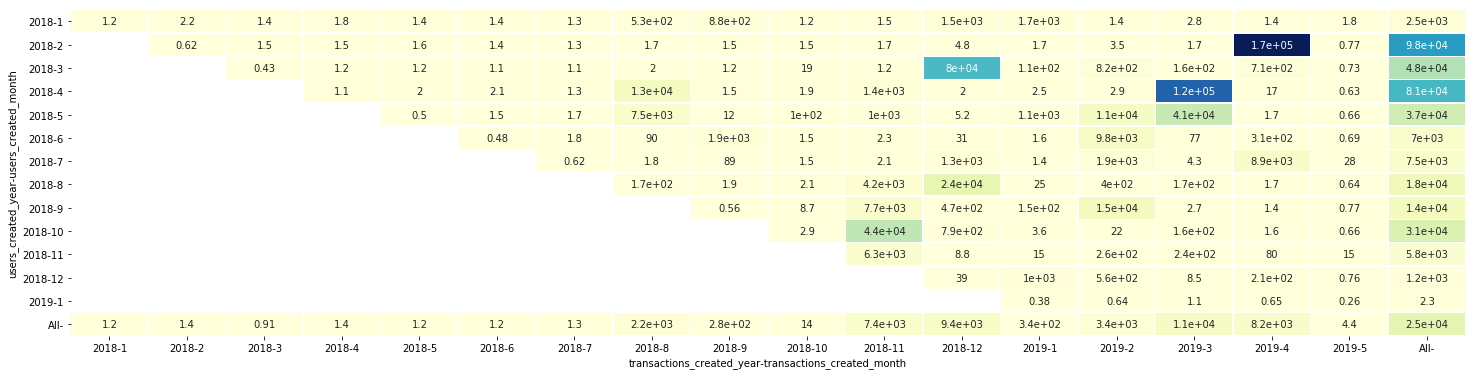

In [25]:
# LTV defined by amount of transactions per user

print('LTV defined by amount of transactions (in thousands) per user')
ltv = amount_transactions.div(num_users, level=None, fill_value=None)/1000

f, ax = plt.subplots(figsize=(25, 6))
sns.heatmap(ltv, cmap="YlGnBu", annot=True, cbar=False, linewidths=.5, ax=ax).plot()


The heatmap is similar to what we saw with the heatmap of amount_transactions

Now let's check if the amount of transactions increase with increased num of users

C:\Users\bijno\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:543: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


[]

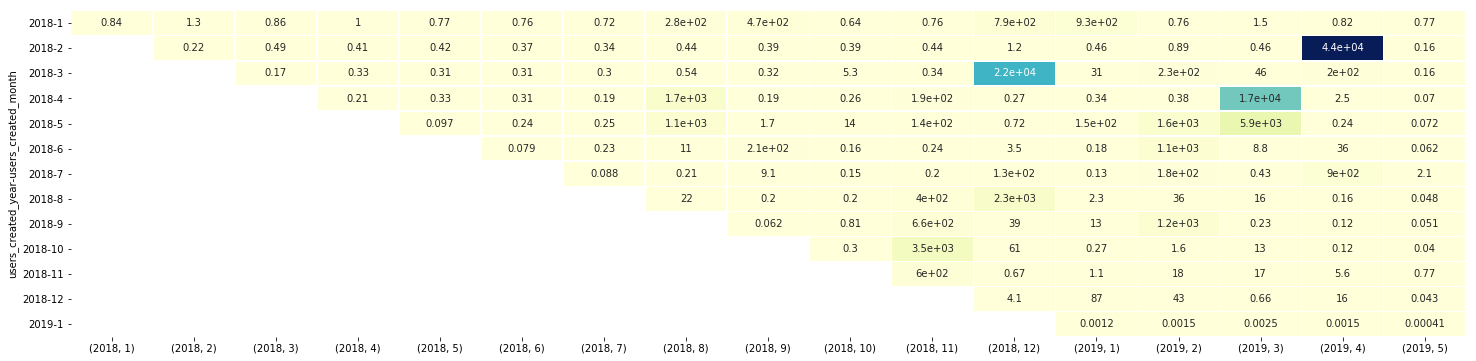

In [51]:
#total_users = pd.DataFrame(users.groupby(['users_created_year', 'users_created_month'])['user_id'].count().fillna(0))
#total_users['cumsum_users'] = total_users.cumsum()
#total_users

merged_crosstab = amount_transactions.merge(pd.DataFrame(num_users_total['All'].cumsum()), how='outer', left_index=True, right_index=True)

#let's normalize it
merged_crosstab = merged_crosstab.iloc[:,:].div(merged_crosstab.All, axis=0)

merged_crosstab = merged_crosstab.drop(columns=['All'])
merged_crosstab = merged_crosstab.drop([['All', '']])

f, ax = plt.subplots(figsize=(25, 6))
sns.heatmap(merged_crosstab/1000, cmap="YlGnBu", annot=True, cbar=False, linewidths=.5, ax=ax).plot()


No specific pattern here!

C:\Users\bijno\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:543: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


[]

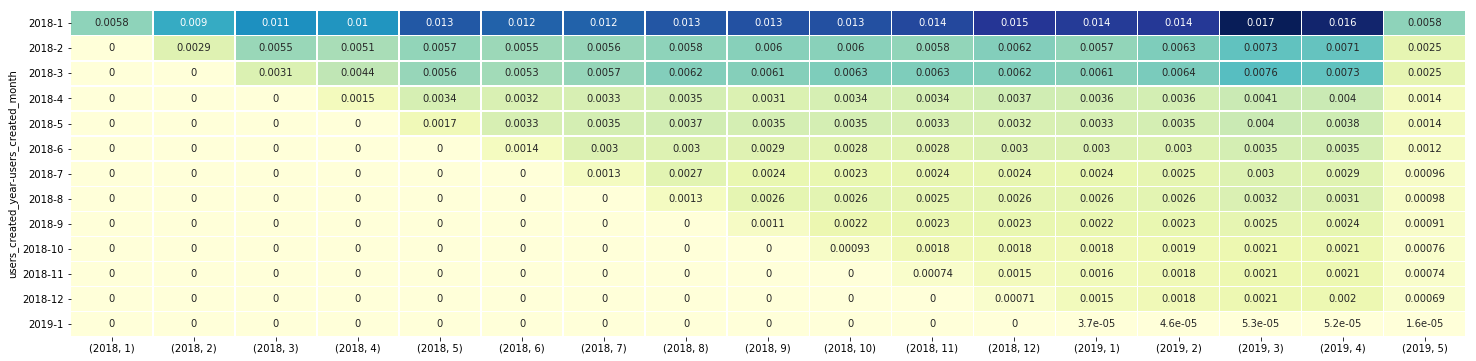

In [52]:
num_transactions = pd.DataFrame(pd.crosstab([ut.users_created_year, ut.users_created_month], [ut.transactions_created_year, ut.transactions_created_month]))

merged_crosstab = num_transactions.merge(pd.DataFrame(num_users_total['All'].cumsum()), how='outer', left_index=True, right_index=True)

#let's normalize it
merged_crosstab = merged_crosstab.iloc[:,:].div(merged_crosstab.All, axis=0)

merged_crosstab = merged_crosstab.drop(columns=['All'])
merged_crosstab = merged_crosstab.drop([['All', '']])

f, ax = plt.subplots(figsize=(25, 6))
sns.heatmap(merged_crosstab/1000, cmap="YlGnBu", annot=True, cbar=False, linewidths=.5, ax=ax).plot()


with increased num of users the number of transactions should be increased, but there seems to be a downfall of num of transactions per user with time

# User transaction Funnel

In [63]:
ut['transaction_day_after_joining'] = pd.DatetimeIndex(ut.created_date_y)-pd.DatetimeIndex(ut.created_date_x)
ut['transaction_month_after_joining'] = ((pd.DatetimeIndex(ut.created_date_y)-pd.DatetimeIndex(ut.created_date_x))/30).days
ut.head(5)

,user_id,birth_year,country,city,created_date_x,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,...,ea_merchant_city,ea_merchant_country,direction,created_date_y,transactions_date_year,transactions_date_month,transactions_created_year,transactions_created_month,transaction_day_after_joining,transaction_month_after_joining
0,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.0,1.0,3,...,NaN,NaN,OUTBOUND,2018-06-19 01:36:43.065466,2018,6,2018,6,156 days 20:21:27.466000,5
1,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.0,1.0,3,...,NaN,NaN,OUTBOUND,2018-06-25 03:51:25.977466,2018,6,2018,6,162 days 22:36:10.378000,5
2,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.0,1.0,3,...,1760483369,USA,OUTBOUND,2018-06-19 01:39:43.741466,2018,6,2018,6,156 days 20:24:28.142000,5
3,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.0,1.0,3,...,Lahore,PAK,OUTBOUND,2018-08-04 00:45:28.893466,2018,8,2018,8,202 days 19:30:13.294000,6
4,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.0,1.0,3,...,888-283-5051,USA,OUTBOUND,2019-01-25 11:07:06.359466,2019,1,2019,1,377 days 05:51:50.760000,12


In [77]:
transaction_from_month_of_joining = pd.DataFrame(pd.crosstab([ut.users_created_year, ut.users_created_month], ut['transaction_month_after_joining'], margins=True))
transaction_from_month_of_joining

transaction_month_after_joining              0       1       2       3  \
users_created_year users_created_month                                   
2018               1                     11355   11365   10513   12585   
                   2                     11105   10318   10680   10525   
                   3                     17747   18458   19912   19301   
                   4                     16201   15791   15430   15796   
                   5                     20765   21997   22007   23150   
                   6                     22347   23862   22534   22040   
                   7                     23930   24264   21542   22690   
                   8                     28967   29103   28518   28649   
                   9                     26359   29585   30065   27560   
                   10                    24736   27582   25255   27536   
                   11                    24543   24713   28148   32894   
                   12                    24179   32288   37615   37346   
2019               1                       685     953     939     983   
All                                     252919  270279  273158  281055   

transaction_month_after_joining              4       5       6       7  \
users_created_year users_created_month                                   
2018               1                     13267   13073   13039   13940   
                   2                     10206   10761   11028   11492   
                   3                     21153   22248   22491   23128   
                   4                     16254   15378   16166   17613   
                   5                     21614   21943   20378   19814   
                   6                     21322   23310   22407   23890   
                   7                     22701   20797   23979   25761   
                   8                     27591   30214   32740   34923   
                   9                     29965   31925   31655   26214   
                   10                    29626   29685   26223    2738   
                   11                    34147   26408    2117       0   
                   12                    30639    2433       0       0   
2019               1                       275       0       0       0   
All                                     278760  248175  222223  199513   

transaction_month_after_joining              8       9      10     11     12  \
users_created_year users_created_month                                         
2018               1                     14331   13806   15250  14663  15573   
                   2                     11041   11439   11498  11376  13681   
                   3                     22903   22398   22337  25877  27037   
                   4                     16746   17217   19080  19345  17002   
                   5                     22485   24045   24963  20751   3152   
                   6                     26126   26492   24413   3241      0   
                   7                     26657   22464    2724      0      0   
                   8                     26851    2554       0      0      0   
                   9                      3012       0       0      0      0   
                   10                        0       0       0      0      0   
                   11                        0       0       0      0      0   
                   12                        0       0       0      0      0   
2019               1                         0       0       0      0      0   
All                                     170152  140415  120265  95253  76445   

transaction_month_after_joining            13     14     15    16      All  
users_created_year users_created_month                                      
2018               1                    16733  17125  14704  1946   223268  
                   2                    13497  12553   1992     0   173192  
                   3                    2

[]

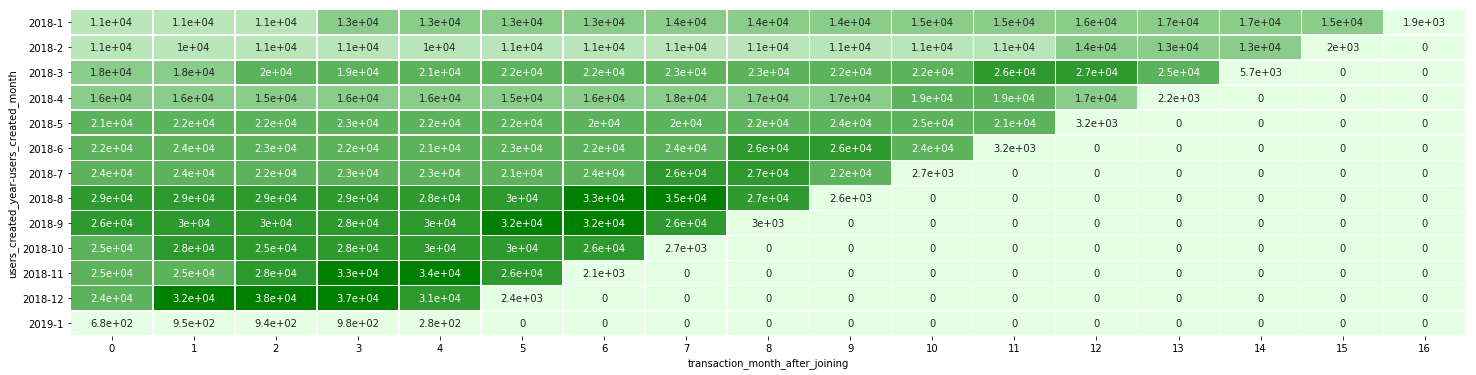

In [78]:
transaction_from_month_of_joining = transaction_from_month_of_joining.drop(columns=['All'])
transaction_from_month_of_joining = transaction_from_month_of_joining.drop([['All','']])

f, ax = plt.subplots(figsize=(25, 6))
sns.heatmap(transaction_from_month_of_joining, cmap=sns.light_palette("green"), annot=True, cbar=False, linewidths=.5, ax=ax).plot()


In [86]:
transacted_users_from_month_of_joining

transaction_month_after_joining               0         1         2   \
users_created_year users_created_month                                 
2018               1                    0.789179  0.622201  0.560634   
                   2                    0.875000  0.633028  0.584862   
                   3                    0.879183  0.560976  0.562677   
                   4                    0.867925  0.619211  0.622642   
                   5                    0.886780  0.632853  0.602094   
                   6                    0.915741  0.632920  0.611365   
                   7                    0.925373  0.672291  0.605451   
                   8                    0.920838  0.662980  0.612922   
                   9                    0.917156  0.662162  0.645711   
                   10                   0.928196  0.653824  0.642148   
                   11                   0.929360  0.651766  0.628587   
                   12                   0.924891  0.645852  0.639738   
2019               1                    0.965517  0.741379  0.758621   

transaction_month_after_joining               3         4         5   \
users_created_year users_created_month                                 
2018               1                    0.542910  0.544776  0.554104   
                   2                    0.579128  0.583716  0.581422   
                   3                    0.560408  0.551333  0.571185   
                   4                    0.592624  0.582333  0.550600   
                   5                    0.601440  0.581806  0.564791   
                   6                    0.568909  0.551274  0.564337   
                   7                    0.576898  0.589228  0.565866   
                   8                    0.616414  0.607101  0.619325   
                   9                    0.606345  0.617509  0.625147   
                   10                   0.636894  0.640397  0.651489   
                   11                   0.635762  0.644592  0.590508   
                   12                   0.632314  0.589083  0.144978   
2019               1                    0.758621  0.517241       NaN   

transaction_month_after_joining               6         7         8   \
users_created_year users_created_month                                 
2018               1                    0.539179  0.526119  0.539179   
                   2                    0.576835  0.574541  0.569954   
                   3                    0.557572  0.577992  0.572887   
                   4                    0.566895  0.562607  0.547170   
                   5                    0.568717  0.556937  0.562827   
                   6                    0.558459  0.569562  0.587198   
                   7                    0.565866  0.589228  0.599611   
                   8                    0.615250  0.609430  0.600698   
                   9                    0.629847  0.608108  0.185664   
                   10                   0.631640  0.178634       NaN   
                   11                   0.129139       NaN       NaN   
                   12                        NaN       NaN       NaN   
2019               1                         NaN       NaN       NaN   

transaction_month_after_joining               9         10        11  \
users_created_year users_created_month                                 
2018               1                    0.516791  0.524254  0.527052   
                   2                    0.572248  0.573394  0.586009   
                   3                    0.574022  0.581395  0.606920   
                   4                    0.568611  0.567753  0.585763   
                   5                    0.590969  0.604712  0.568717   
                   6                    0.583932  0.581973  0.183540   
                   7                    0.597664  0.175211       NaN   
                   8                    0.160070       NaN       NaN   
                   9                 

num of users which tend to transact in their first month of joining are ~90% which drops down to 60% in second, 3rd and 4th months

In [87]:
ut.head(5)

,user_id,birth_year,country,city,created_date_x,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,...,ea_merchant_city,ea_merchant_country,direction,created_date_y,transactions_date_year,transactions_date_month,transactions_created_year,transactions_created_month,transaction_day_after_joining,transaction_month_after_joining
0,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.0,1.0,3,...,NaN,NaN,OUTBOUND,2018-06-19 01:36:43.065466,2018,6,2018,6,156 days 20:21:27.466000,5
1,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.0,1.0,3,...,NaN,NaN,OUTBOUND,2018-06-25 03:51:25.977466,2018,6,2018,6,162 days 22:36:10.378000,5
2,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.0,1.0,3,...,1760483369,USA,OUTBOUND,2018-06-19 01:39:43.741466,2018,6,2018,6,156 days 20:24:28.142000,5
3,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.0,1.0,3,...,Lahore,PAK,OUTBOUND,2018-08-04 00:45:28.893466,2018,8,2018,8,202 days 19:30:13.294000,6
4,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.0,1.0,3,...,888-283-5051,USA,OUTBOUND,2019-01-25 11:07:06.359466,2019,1,2019,1,377 days 05:51:50.760000,12


In [91]:
print('Total num users =', users.user_id.nunique(), '\nNum of users who ever transacted =', ut.user_id.nunique(), '\nNum of users who never transacted =', users.user_id.nunique()-ut.user_id.nunique())

Total num users = 19430 
Num of users who ever transacted = 18766 
Num of users who never transacted = 664


In [104]:
ut[['user_id', 'transaction_month_after_joining']]

,user_id,transaction_month_after_joining
0,user_0,5
1,user_0,5
2,user_0,5
3,user_0,6
4,user_0,12
5,user_0,15
6,user_0,2
7,user_0,6
8,user_0,5
9,user_0,9


In [ ]:
ut['users_created_year', 'users_created_month'].groupby('transaction_month_after_joining')

In [124]:
ltv = pd.DataFrame()
ltv['same month'] = ut[ut.transaction_month_after_joining==0].groupby(['users_created_year', 'users_created_month']).user_id.nunique()
#ltv['cont 2 months'] = 
ut[ut.transaction_month_after_joining==0]#[ut.transaction_month_after_joining==1]#.groupby(['users_created_year', 'users_created_month']).user_id.nunique()
#ltv

,user_id,birth_year,country,city,created_date_x,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,...,ea_merchant_city,ea_merchant_country,direction,created_date_y,transactions_date_year,transactions_date_month,transactions_created_year,transactions_created_month,transaction_day_after_joining,transaction_month_after_joining
12,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.0,1.0,3,...,NaN,NaN,OUTBOUND,2018-02-01 21:34:20.409466,2018,2,2018,2,19 days 16:19:04.810000,0
13,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.0,1.0,3,...,NaN,NaN,INBOUND,2018-02-01 21:33:40.842466,2018,2,2018,2,19 days 16:18:25.243000,0
14,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.0,1.0,3,...,NaN,NaN,INBOUND,2018-02-01 21:33:21.669466,2018,2,2018,2,19 days 16:18:06.070000,0
15,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.0,1.0,3,...,NaN,NaN,OUTBOUND,2018-01-16 23:30:38.475466,2018,1,2018,1,3 days 18:15:22.876000,0
16,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.0,1.0,3,...,NaN,NaN,OUTBOUND,2018-01-17 01:39:17.613466,2018,1,2018,1,3 days 20:24:02.014000,0
18,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.0,1.0,3,...,NaN,NaN,INBOUND,2018-01-19 02:57:30.814466,2018,1,2018,1,5 days 21:42:15.215000,0
19,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.0,1.0,3,...,NaN,NaN,INBOUND,2018-01-19 02:58:22.718466,2018,1,2018,1,5 days 21:43:07.119000,0
24,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.0,1.0,3,...,NaN,NaN,INBOUND,2018-01-16 23:24:18.666466,2018,1,2018,1,3 days 18:09:03.067000,0
72,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.0,1.0,3,...,NaN,NaN,INBOUND,2018-01-16 23:23:48.330466,2018,1,2018,1,3 days 18:08:32.731000,0
73,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.0,1.0,3,...,NaN,NaN,OUTBOUND,2018-01-18 11:03:49.434466,2018,1,2018,1,5 days 05:48:33.835000,0


# evaluation of the session_interval - ANOVA

session_interval = average time spent between two transactions

To understand the time difference between various users, let's carry out ANOVA. As num of transaction by various users are not same, we can say that num of samples in each group i.e. users are not equal thus we're facing Class Imbalance problem

In [16]:
def get_anova_df(ut):
    ut_sorted = ut.sort_values(['user_id', 'transaction_created'], ascending=[True, True]).reset_index(drop=True)
    anova_df = ut_sorted[['user_id', 'transaction_created', 'amount_usd']]

    anova_df['user_id_shift'] = anova_df['user_id'].shift(1) # not necessary, will be faster
    anova_df['transaction_created_shift'] = anova_df['transaction_created'].shift(1)

    anova_df['time_diff'] = np.where(anova_df['user_id_shift']==anova_df['user_id'], (anova_df['transaction_created']-anova_df['transaction_created_shift']).dt.days, 0)

    return anova_df

def get_anova_data_list(anova_df):
    prev_usrid = None
    user_list = list()
    i = 0

    for index, rows in anova_df.iterrows():
        usrid = rows.user_id

        if usrid==prev_usrid:
            user_list[i-1].append(rows.time_diff)
        else:
            user_list.append(list())
            i += 1
        prev_usrid = usrid
    return user_list

def add_dead_users(user_list, users):
    # Handle users who have only one transaction, in that case the sub-list will be empty. Append that list with a value of zero
    for i in user_list:
        if len(i)==0:
            i.append(-1)
    # handle users who are not in transactions table
    list_to_extend = (len(users)-len(user_list))
    user_list.extend([[-1]]*list_to_extend)
    return user_list
    
# Quality check
def quality_check_anova(user_list):
    wrong_list = []
    for i in user_list:
        if len(i)==0:
            wrong_list.append(i)
    return wrong_list

In [18]:
# Run anova
anova_df = get_anova_df(ut)


C:\Users\bijno\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\bijno\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\bijno\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

In [19]:
user_list = get_anova_data_list(anova_df)

In [20]:
user_list = add_dead_users(user_list, users)

In [21]:
print(quality_check_anova(user_list))

[]


In [25]:
f_val, p_val = stats.f_oneway(*user_list)
print(p_val, f_val)

0.0 16.948653925403125


the above p-value means that the difference between some of the means is statistically significant, which tells that the users transact in different manners. <br>
We can also say that some users will be more engaged than others. Next is to define the metric for engagement

### Define engagement metric

#### Reasoning behind selection of the engagement metric:
Business -> consider transaction volume, as with increase in transaction volume i.e. amount, customers' increased trust could be inferred. Transaction amount of the completed transactions <br>
Normalize -> use currency convertor on the transaction amount <br>
Remove noise -> take average of last n num of days (n is yet to be decided)

In [10]:
anova_total = anova_df[['user_id', 'time_diff']].describe()
print(anova_total)
print('=> total mean of the time difference (between two transactions) is', anova_total.loc['mean'].values[0], 'days')
print()

anova_within = anova_df[['user_id', 'time_diff']].groupby('user_id').mean().describe()
print(anova_within)
print('=> mean within groups of time difference (between two transactions) is', anova_within.loc['mean'].values[0], 'days')
n = int(anova_within.loc['mean'].values[0])

NameError: name 'anova_df' is not defined

For the volume, various metrics that are considered are as follows:<br>
L1 metric -> people who used it it last one day, or use it regularly everyday <br>
L7 metric -> people who used at least once in last 7 days <br>
L30 metric -> people who use it at least once a month <br>
we'll focus on L5 metric first (mean from the above table) and see results<br>
Note: taking the help of the above table we could also use the median (2.448 ~= 2.5 days) and consider L2.5 metric <br>

our engagement metric will be seen as: <br>
=> engagement = (total transaction amount in last 5 days)/5/(currency convertor to convert the amount to EUR) <br>
Since in the transaction table, the columns amount_usd already have the currency normalized, we'll use the engagement metric as:<br>
=> engagement = (total transaction amount in last 5 days)/5 <br>


Assumption: take 500 days of transaction data to define engagement. The same can be used while building pipelines

we need a table with <br>
user | date | amount_usd | amount_L5 | engagement (=amount_L7_in_euro/7)

In [31]:
#engagement_table = ut[['user_id', 'amount_usd', 'transactions_state', 'user_created', 'transaction_created']]
#engagement_table.head(1)

create a table where<br>
for every user, for every date from first user created date

In [95]:
pd.set_option('display.max_columns', None)

In [119]:
# create a column in ut as list_location which will be transaction_created - min_date
ut['list_location'] = (ut.transaction_created-min_date).dt.days
ut.head(2)

,user_id,birth_year,country,city,created_date_x,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,users_created_year,users_created_month,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,created_date_y,transactions_created_year,transactions_created_month,transaction_created,user_created,list_location
0,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.0,1.0,3,0,0,2018,1,transaction_27901,EXCHANGE,GBP,2.12,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,2018-06-19 01:36:43.065466,2018,6,2018-06-19,2018-01-13,169
1,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.0,1.0,3,0,0,2018,1,transaction_89006,EXCHANGE,SGD,27.90,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,2018-06-25 03:51:25.977466,2018,6,2018-06-25,2018-01-13,175


In [123]:
ut_comp = ut[ut['transactions_state']=='COMPLETED']

list_location,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
count,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.00000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,

In [137]:
def get_transaction_crosstab(ut_comp):
    data = ut_comp[['user_id', 'user_created', 'list_location', 'amount_usd']]
    data2 = pd.DataFrame(pd.crosstab(data.user_id, data.list_location, values=data['amount_usd'], aggfunc='sum', margins=True))
    # has only 18k users, append the rest as well
    data2 = data2.drop(columns='All')

    try:
        data2 = data2.drop(columns=0)
    except KeyError:
        pass
    try:
        data2 = data2.drop(columns=500)
    except KeyError:
        pass

    # delete the row
    data2 = data2.drop('All')

    data2 = data2.fillna(0)
    return data2

data = get_transaction_crosstab(ut_comp)
data.describe()

list_location,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
count,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.00000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,

In [138]:
# quality check the data
def get_data_min_max(data):
    dataset_min = min(data.min())
    dataset_max = max(data.max())
    #print(dataset_min)
    #print(dataset_max)
    return dataset_max, dataset_min

get_data_min_max(data)

(621881.2500000001, 0.0)

In [139]:
def remove_noise(df, n=5):
    df_cumsum = df.cumsum(axis=1) 
    df_cumsum2 = df_cumsum.shift(periods=n,axis=1).fillna(0)#,fill_value=0)
    chk = df_cumsum-df_cumsum2
    for i in range(1,n-1):
        chk[i] = df[i]
    return chk

data2 = remove_noise(data, n=n)
data2.head(2)

list_location,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
user_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.76,89.46,142.01,184.99,143.23,95.53,42.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,437.43,609.32,609.32,609.32,171.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.18,63.71,63.71,63.71,214.95,189.42,189.42,198.02,317.23,573.7,720.98,951.47,736.6,480.13,332.85,93.76,0.0,0.0,0.00,0.00,0.00,9.27,21.99,21.99,21.99,12.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1208.95,1220.56,1220.56,1220.56,11.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,119.3,132.41,132.41,132.41,13.11,0.0,22.89,118.68,118.68,118.68,95.79,0.0,0.0,1.71,7.26,54.9,54.9,62.32,56.77,9.13,9.13,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140.18,140.18,140.18,140.18,0.00,0.0,0.0,39.36,61.39,61.39,61.39,22.03,45.73,67.01,576.29,576.29,530.56,509.28,23.78,23.78,23.78,23.78,0.0,0.0,114.14,114.14,114.14,114.14,0.0,0.0,0.0,212.77,402.64,402.64,402.64,189.87,0.0,0.0,0.0,41.66,41.66,41.66,41.66,0.0,0.0,0.0,179.17,179.17,587.14,652.92,581.53,589.38,421.17,355.39,247.61,247.65,7.89,7.89,7.89,0.53,0.53,0.53,0.53,178.95,540.21,540.21,544.29,385.19,37.85,40.43,71.34,54.87,40.95,38.37,3.38,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,55.32,55.32,55.32,55.32,0.0,73.79,73.79,73.79,73.79,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.11,24.11,26.1,26.1,378.19,378.19,376.2,376.2,42.55,42.55,42.75,42.95,46.49,48.08,133.83,133.63,87.54,85.95,0.0,0.0,0.0,0.0,0.0,1.99,30.55

In [140]:
def scalarize_data(dataset):
    dataset_min = min(dataset.min())
    dataset_max = max(dataset.max())
    dataNorm=((dataset-dataset_min)/(dataset_max-dataset_min))
    return dataNorm

scalar_data = scalarize_data(data2)

print(get_data_min_max(scalar_data))

scalar_data.sum(axis=1)

(1.0, 0.0)


user_id
user_0        0.040950
user_1        0.018471
user_10       0.079346
user_100      0.052144
user_1000     0.065166
user_10000    0.039607
user_10001    0.007901
user_10002    0.026303
user_10004    0.003553
user_10005    0.005756
user_10006    0.002111
user_10007    0.007193
user_10008    0.008245
user_10009    0.046123
user_1001     0.004215
user_10010    0.016867
user_10011    0.034112
user_10012    0.009698
user_10013    0.001964
user_10014    0.011571
user_10015    0.013283
user_10016    0.045340
user_10017    0.016500
user_10018    0.010008
user_10019    0.117320
user_1002     0.081922
user_10020    0.000198
user_10021    0.018367
user_10022    0.006083
user_10023    0.006558
                ...   
user_9970     0.131749
user_9971     0.004309
user_9972     0.023391
user_9973     0.000080
user_9975     0.001345
user_9976     0.004257
user_9977     0.006562
user_9978     0.003851
user_9979     0.009667
user_998      0.001340
user_9980     0.001938
user_9981     0.007340
use

1) get the total transaction amount <br>
2) take average of last n days transacted amount <br>
3) scalarize the amount between 0 to 1 <br>
4) 

In [160]:
def num_engaged_users(scalar_data, val):
    engaged_users = []
    for column in scalar_data:
        engaged_users.append(len(scalar_data[(scalar_data[column]>val)]))#.count())
    tot = sum(engaged_users)
    print('Num users*days considered engaged thusly:', tot)#.count())
    return engaged_users
    
def num_engaged_days_users(scalar_data):
    for val in range(0,10,1):
        i = 0
        for column in scalar_data:
            if scalar_data[column].max()>val/10:
                i += 1
        print('threshold=', val/10, 'Num days where there''s engagement:',i)
        num_engaged_users(scalar_data, val/10)
        i = 0
    for column in scalar_data:
        if scalar_data[column].max()>0.05:
            i += 1
    print('threshold=', 0.05, 'Num days where there''s engagement:', i)
    num_engaged_users(scalar_data, 0.5)

num_engaged_days_users(scalar_data)

threshold= 0.0 Num days where theres engagement: 499
Num users*days considered engaged thusly: 1667494
threshold= 0.1 Num days where theres engagement: 130
Num users*days considered engaged thusly: 176
threshold= 0.2 Num days where theres engagement: 50
Num users*days considered engaged thusly: 56
threshold= 0.3 Num days where theres engagement: 22
Num users*days considered engaged thusly: 22
threshold= 0.4 Num days where theres engagement: 9
Num users*days considered engaged thusly: 9
threshold= 0.5 Num days where theres engagement: 4
Num users*days considered engaged thusly: 4
threshold= 0.6 Num days where theres engagement: 3
Num users*days considered engaged thusly: 3
threshold= 0.7 Num days where theres engagement: 3
Num users*days considered engaged thusly: 3
threshold= 0.8 Num days where theres engagement: 3
Num users*days considered engaged thusly: 3
threshold= 0.9 Num days where theres engagement: 3
Num users*days considered engaged thusly: 3
threshold= 0.05 Num days where the

this means, if we pick the definition of engagement to be @0.1; then out of 500 days, only 130 days some or the other user will be considered engaged

using Pareto, let's say the users with:<br> 
transactions_nD>=0.2 are engaged; and that have <br>
transactions_nD<0.2 are not engaged

out of 18k*500 users*time, there's only 56 times engagement with this method. This shows that we have considered outliers as well, let's remove them

#### remove outliers using z-score

In [147]:
z = np.abs(stats.zscore(data))
print(z)
threshold = 3 # with 4 num of data points increase by ~1k
data_rm_out = data[(z < threshold).all(axis=1)]
data_rm_out.describe()

[[0.01464639 0.02261939 0.01955692 ... 0.02441935 0.01021022 0.01162713]
 [0.01464639 0.02261939 0.01955692 ... 0.02441935 0.01021022 0.01162713]
 [0.01464639 0.02261939 3.26712579 ... 0.02441935 0.01021022 0.01162713]
 ...
 [0.01464639 0.02261939 0.01955692 ... 0.02441935 0.01021022 0.01162713]
 [0.01464639 0.02261939 0.01955692 ... 0.02441935 0.01021022 0.01162713]
 [0.01464639 0.02261939 0.01955692 ... 0.02441935 0.01021022 0.01162713]]


list_location,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
count,11740.0,11740.0,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000

In [182]:
pd.DataFrame(z)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498
0,0.014646,0.022619,0.019557,0.028184,0.021077,0.013842,0.023430,0.027713,0.014923,0.019202,0.014616,0.012223,0.032185,0.027297,0.834034,0.170233,0.286867,0.167208,0.019998,0.025737,0.021461,0.028951,0.032664,0.017930,0.022205,0.022770,0.017702,0.018059,0.015317,0.022706,1.282233,3.015173,0.024990,0.020401,0.025267,0.028432,0.024925,0.017331,0.039920,0.017998,0.014688,0.043605,0.038789,0.012123,0.016377,0.017696,0.030184,0.031860,0.033772,0.024733,0.418087,0.524550,0.033268,0.034976,8.261535,0.034235,0.038151,0.062604,2.035042,3.346613,0.602581,7.737187,3.816633,0.047542,0.040109,0.047431,0.044615,0.023342,0.050496,0.023180,0.050939,0.157140,0.053930,0.036581,0.020087,0.044509,0.042208,0.044615,0.023442,0.037249,0.054109,0.030339,0.058722,0.051937,0.050314,0.058541,0.029233,0.037975,0.052020,0.065337,0.057728,0.057597,0.040853,0.039396,2.766966,0.014298,0.049707,0.041120,0.049631,0.041987,0.032284,0.045556,0.045410,0.055405,0.048657,0.023907,0.031341,0.011792,0.011248,0.019618,0.015295,0.043948,0.522596,0.125725,0.021398,0.051126,0.029605,0.037144,0.056138,0.232925,0.020050,0.010589,0.053651,0.072891,0.087269,0.017715,0.005129,0.222009,0.048737,0.026974,0.052330,0.067591,0.070517,0.028414,0.039820,0.058899,0.036587,0.030608,0.036739,0.065041,0.014650,0.015425,0.040636,0.043966,0.04807,0.041878,0.068777,0.052076,0.049540,0.068351,0.790782,0.016063,0.030668,0.077182,0.046539,0.015585,0.047789,0.047534,0.076702,0.055673,0.019463,0.049880,0.454924,0.102760,0.484330,0.085980,0.086341,0.056348,0.176949,0.019344,0.039078,0.051554,0.062749,0.078663,1.465237,0.066300,0.072518,0.050620,0.024510,0.068824,0.070622,1.825002,0.840877,0.050729,0.055578,0.045917,0.088104,0.073763,0.0695,0.155333,0.045941,0.058300,0.040448,0.041684,0.050732,0.043057,0.355928,0.053981,1.603423,0.310749,0.163890,0.007792,1.657495,0.041064,0.053102,0.024267,0.067652,0.063823,0.099032,0.082092,0.052861,0.071465,0.020669,0.424110,1.323542,0.027771,0.050369,0.056312,0.008339,0.023279,0.082309,0.049233,0.033168,0.057840,0.067216,0.043200,0.024845,0.032198,0.043202,0.080445,0.104394,0.042972,0.031715,0.044190,0.039380

In [183]:
pd.DataFrame(z).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498
count,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,18529.000000,1

In [265]:
scalar_data_rm_o = scalarize_data(remove_noise(data_rm_out, n=n))


In [156]:
num_engaged_days_users(scalar_data_rm_o)

threshold= 0.0 Num days where theres engagement: 497
Num users considered engaged thusly: 727326
threshold= 0.1 Num days where theres engagement: 414
Num users considered engaged thusly: 23559
threshold= 0.2 Num days where theres engagement: 322
Num users considered engaged thusly: 3612
threshold= 0.3 Num days where theres engagement: 200
Num users considered engaged thusly: 907
threshold= 0.4 Num days where theres engagement: 124
Num users considered engaged thusly: 276
threshold= 0.5 Num days where theres engagement: 71
Num users considered engaged thusly: 99
threshold= 0.6 Num days where theres engagement: 35
Num users considered engaged thusly: 38
threshold= 0.7 Num days where theres engagement: 19
Num users considered engaged thusly: 19
threshold= 0.8 Num days where theres engagement: 11
Num users considered engaged thusly: 11
threshold= 0.9 Num days where theres engagement: 7
Num users considered engaged thusly: 7
threshold= 0.05 Num days where theres engagement: 469
Num users co

Num users*days considered engaged thusly: 23559
Num users*days considered engaged thusly: 3612
Num users*days considered engaged thusly: 907
Num users*days considered engaged thusly: 276
Num users*days considered engaged thusly: 99
Num users*days considered engaged thusly: 38
Num users*days considered engaged thusly: 19
Num users*days considered engaged thusly: 11
Num users*days considered engaged thusly: 7


"\naxs[0, 1].plot(x, y, 'tab:orange')\naxs[0, 1].set_title('Axis [0,1]')\naxs[1, 0].plot(x, -y, 'tab:green')\naxs[1, 0].set_title('Axis [1,0]')\naxs[1, 1].plot(x, -y, 'tab:red')\naxs[1, 1].set_title('Axis [1,1]')\n"

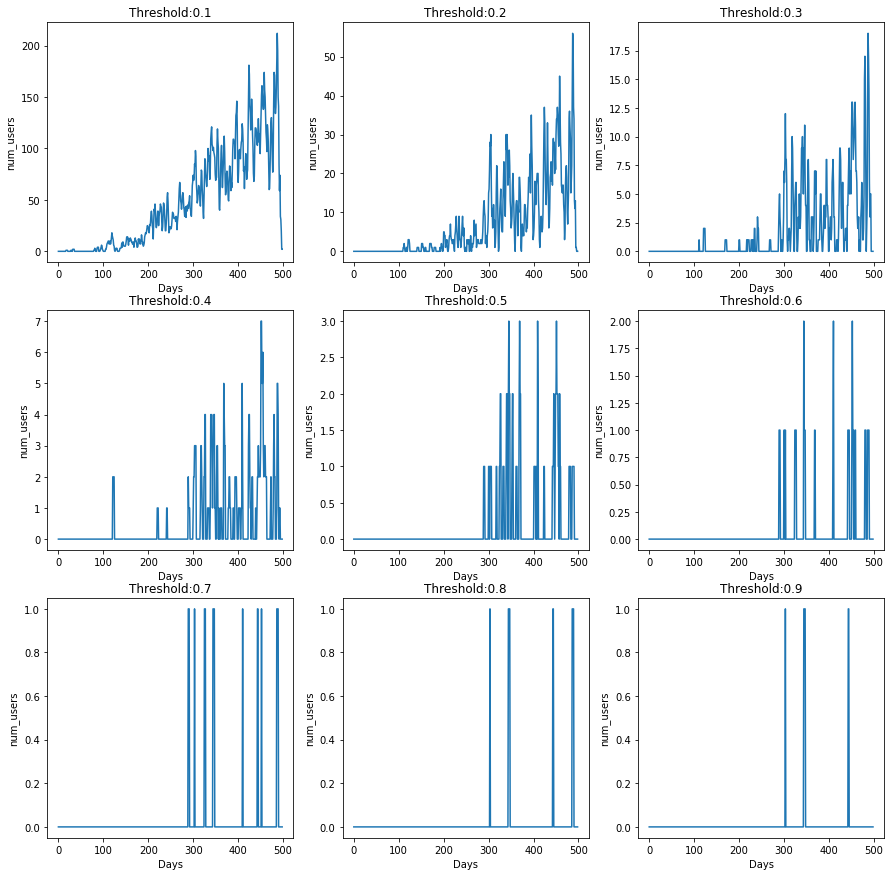

In [176]:
i = 0.1
fig, axs = plt.subplots(3, 3, figsize=(15,15))
for ax in axs.flat:
    ax.plot(num_engaged_users(scalar_data_rm_o, i))
    ax.set_xlabel('Days')
    ax.set_ylabel('num_users')
    ax.set_title('Threshold:' + str(round(i, 2)))
    i += 0.1


With time more users are onboarded and thus we have more users towards the end to make any transactions. No doubt, the above graph shows that the num of engaged users increases with time. Had this not been the case, we would be looking into the causes!

Num users*days considered engaged thusly: 3612


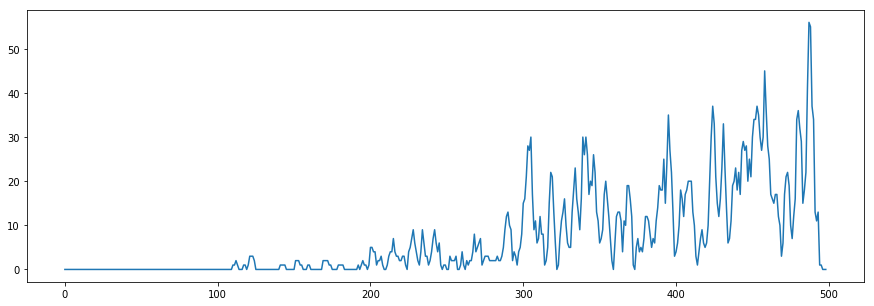

In [180]:
#fig, ax = plt.subplots(3, 3, figsize=(15,15))
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(num_engaged_users(scalar_data_rm_o, 0.2))#, figsize=(15,15))
#plt.set_xlabel('Days')
#plt.set_ylabel('num_users')
#plt.set_title('Threshold:' + str(round(i, 2)))


shouldn't the definition of engagement change with time?

I prefer density based clustering, as it doesn't require num of clusters and is shape independent, which works well in high dimensional space.<br> The only hyper-parameter to be handled is the min num of points in a cluster. <br> It also gives probability of assining a data point to a cluster. Since not all points are assigned to a cluster
https://towardsdatascience.com/how-to-cluster-in-high-dimensions-4ef693bacc6 <br>


In [203]:
def hdbscan_clusters(hdbscan_data, min_cluster_size = 1000, dimensions = 10):
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
    clusterer.fit(hdbscan_data.iloc[:, -dimensions:])
    return clusterer.labels_.max()+1, clusterer.labels_, clusterer.probabilities_

num_clusters, labels, probabs = hdbscan_clusters(scalar_data_rm_o, 500, 100)
print('Total num of clusters thus made:', num_clusters)
labels

Total num of clusters thus made: 2


array([-1, -1, -1, ..., -1,  1, -1], dtype=int64)

-1 are the outliers, which couldn't fit well to any group

In [220]:
print(type(labels))
print(labels.size)

print(stats.itemfreq(labels))

<class 'numpy.ndarray'>
11740
[[  -1 8115]
 [   0 1191]
 [   1 2434]]


C:\Users\bijno\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  after removing the cwd from sys.path.


In [219]:
len(scalar_data_rm_o)

11740

In [262]:
save_copy = scalar_data_rm_o

cluster = pd.DataFrame()
cluster = cluster.reindex(scalar_data_rm_o.index)
cluster['groups'] = labels.tolist()
print(len(cluster))


11740


,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,groups
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
user_10001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1


In [268]:
final_df = pd.concat([scalar_data_rm_o.iloc[:,-100:-50], cluster['groups']], axis=1)
final_df.head(1)

,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,groups
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
user_10001,0.001343,0.001343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1


In [266]:
scalar_data_rm_o.describe()

list_location,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
count,11740.0,11740.0,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000000,11740.000

In [270]:
print(final_df.groups.unique())
final_df.groups.value_counts()

[-1  0  1]


-1    8115
 1    2434
 0    1191
Name: groups, dtype: int64

In [257]:
len(final_df[final_df['groups']>-1])

3625

In [263]:
print(final_df[final_df['groups']==1].describe())
print(final_df[final_df['groups']==0].describe())


          450     451     452     453     454     455     456     457     458  \
count  2434.0  2434.0  2434.0  2434.0  2434.0  2434.0  2434.0  2434.0  2434.0   
mean      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
std       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
min       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
25%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
50%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
75%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
max       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

          459     460     461     462     463     464     465     466     467  \
count  2434.0  2434.0  2434.0  2434.0  2434.0  2434.0  2434.0  2434.0  2434.0   
mean      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
std       0.0     0.0     0

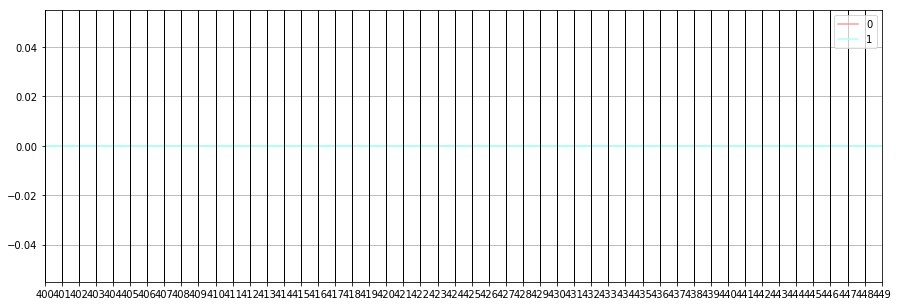

In [271]:
pc = parallel_coordinates(final_df[final_df['groups']>-1], 'groups', color=('#FF9999', '#b0fff8'))

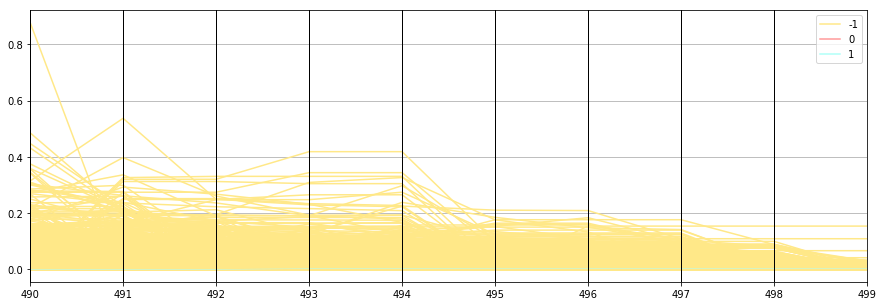

In [255]:

pc = parallel_coordinates(final_df, 'groups', color=('#FFE888', '#FF9999', '#b0fff8'))